In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
#Load the data into a data frame
df = pd.read_csv("stocks2.csv")
df.head(6)

,date,open,high,low,close,volume,Name
0,08-02-2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11-02-2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12-02-2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13-02-2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14-02-2013,14.94,14.96,13.16,13.99,31879900,AAL
5,15-02-2013,13.93,14.61,13.93,14.50,15628000,AAL


In [3]:
#Get the number of training days
df.shape

(364, 7)

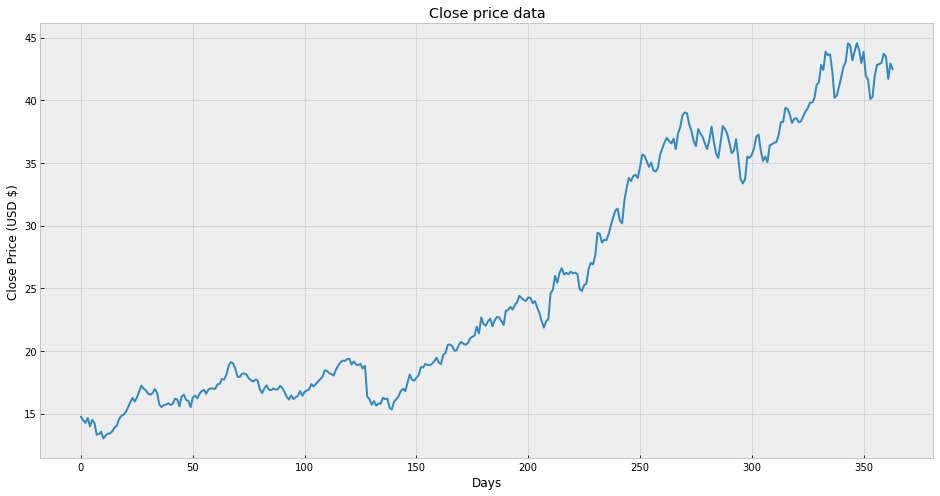

In [4]:
#Visualize the close price data
plt.figure(figsize=(16, 8))
plt.title("Close price data")
plt.xlabel("Days")
plt.ylabel("Close Price (USD $)")
plt.plot(df["close"])
plt.show()

In [5]:
#Get the close price
df2 = df["close"]
df2 = pd.DataFrame(df2)
df2.head(4)

,close
0,14.75
1,14.46
2,14.27
3,14.66


In [6]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df2["prediction"] = df2[["close"]].shift(-future_days)
df2.head(4)

,close,prediction
0,14.75,16.29
1,14.46,16.78
2,14.27,17.23
3,14.66,17.00


In [7]:
#Craete the feature data set (x), convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df2.drop(["prediction"], 1))[:-future_days]
print(x)

[[14.75  ]
 [14.46  ]
 [14.27  ]
 [14.66  ]
 [13.99  ]
 [14.5   ]
 [14.26  ]
 [13.33  ]
 [13.37  ]
 [13.57  ]
 [13.02  ]
 [13.26  ]
 [13.41  ]
 [13.43  ]
 [13.61  ]
 [13.9   ]
 [14.05  ]
 [14.57  ]
 [14.82  ]
 [14.92  ]
 [15.13  ]
 [15.5   ]
 [15.91  ]
 [16.25  ]
 [15.98  ]
 [16.29  ]
 [16.78  ]
 [17.23  ]
 [17.    ]
 [16.86  ]
 [16.6   ]
 [16.51  ]
 [16.65  ]
 [16.97  ]
 [16.67  ]
 [15.74  ]
 [15.53  ]
 [15.69  ]
 [15.72  ]
 [15.84  ]
 [15.7   ]
 [15.78  ]
 [16.19  ]
 [16.14  ]
 [15.59  ]
 [16.37  ]
 [16.52  ]
 [16.1   ]
 [16.02  ]
 [15.52  ]
 [16.3   ]
 [16.45  ]
 [16.22  ]
 [16.59  ]
 [16.81  ]
 [16.9   ]
 [16.6   ]
 [16.94  ]
 [17.02  ]
 [17.    ]
 [16.98  ]
 [17.34  ]
 [17.38  ]
 [17.76  ]
 [17.72  ]
 [18.1   ]
 [18.81  ]
 [19.12  ]
 [19.01  ]
 [18.59  ]
 [17.95  ]
 [17.93  ]
 [18.19  ]
 [18.21  ]
 [18.12  ]
 [17.83  ]
 [17.67  ]
 [17.57  ]
 [17.73  ]
 [17.65  ]
 [16.95  ]
 [16.64  ]
 [17.02  ]
 [17.26  ]
 [16.92  ]
 [16.88  ]
 [17.01  ]
 [16.93  ]
 [16.95  ]
 [17.22  ]
 [17.06  ]

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11856\2446519216.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df2.drop(["prediction"], 1))[:-future_days]


In [8]:
#Create the target data set (y), convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df2["prediction"])[:-future_days]
print(y)

[16.29   16.78   17.23   17.     16.86   16.6    16.51   16.65   16.97
 16.67   15.74   15.53   15.69   15.72   15.84   15.7    15.78   16.19
 16.14   15.59   16.37   16.52   16.1    16.02   15.52   16.3    16.45
 16.22   16.59   16.81   16.9    16.6    16.94   17.02   17.     16.98
 17.34   17.38   17.76   17.72   18.1    18.81   19.12   19.01   18.59
 17.95   17.93   18.19   18.21   18.12   17.83   17.67   17.57   17.73
 17.65   16.95   16.64   17.02   17.26   16.92   16.88   17.01   16.93
 16.95   17.22   17.06   16.73   16.34   16.13   16.46   16.17   16.31
 16.42   16.8    16.43   16.75   16.84   16.94   17.36   17.17   17.37
 17.56   17.76   17.95   18.45   18.42   18.23   18.15   18.05   18.5
 18.83   19.09   19.23   19.2    19.35   19.38   18.92   19.17   18.92
 18.87   18.98   18.6    18.82   16.36   16.17   15.72   16.01   15.64
 15.8    15.81   16.27   16.16   16.21   15.47   15.34   15.96   16.16
 16.39   16.81   16.99   16.8    17.47   18.12   17.72   17.63   17.87
 18.07 

In [9]:
#Split ht data 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [10]:
#create the models
#Craete the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Craete the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [11]:
#Get the last 'x' rows of the feature data set
x_future = df2.drop(["prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11856\3694819027.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(["prediction"], 1)[:-future_days]


array([[38.26 ],
       [39.39 ],
       [39.31 ],
       [38.84 ],
       [38.19 ],
       [38.525],
       [38.57 ],
       [38.24 ],
       [38.32 ],
       [38.72 ],
       [39.11 ],
       [39.35 ],
       [39.8  ],
       [39.82 ],
       [40.16 ],
       [41.22 ],
       [41.44 ],
       [42.82 ],
       [42.41 ],
       [43.88 ],
       [43.59 ],
       [43.66 ],
       [42.29 ],
       [40.2  ],
       [40.38 ]])

In [12]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[41.06   41.87   42.66   43.06   44.55   44.36   43.179  43.91   44.55
 44.     42.96   43.86   41.95   41.62   40.1    40.26   41.985  42.82
 42.88   43.48   43.7    43.48   41.6999 42.9199 42.48  ]

[40.69135543 41.85154488 41.76940757 41.2868509  40.61948529 40.96343526
 41.00963749 40.67082111 40.75295841 41.16364494 41.56406431 41.81047623
 42.27249857 42.2930329  42.64211645 43.73043575 43.95631334 45.37318187
 44.95222818 46.46150118 46.16375344 46.23562359 44.82902222 42.6831851
 42.86799404]


C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11856\3196254201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


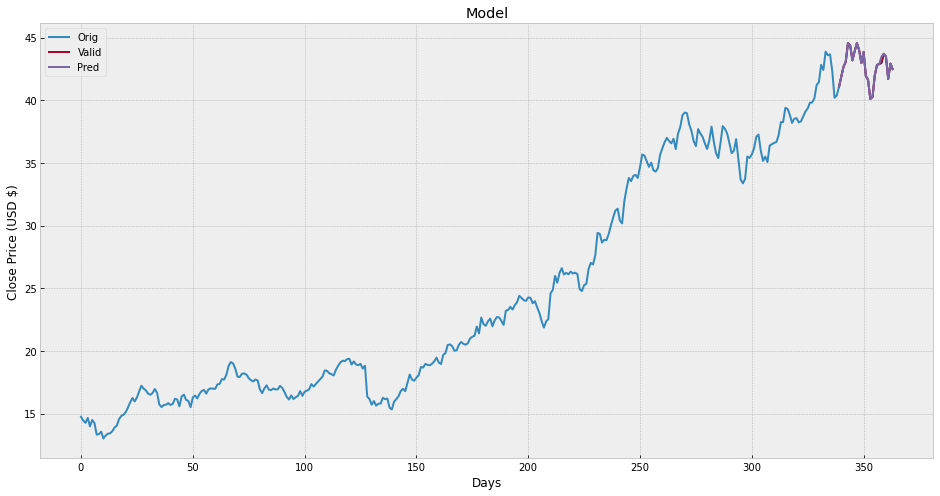

In [13]:
#Visualize the data
predictions = tree_prediction
valid = df[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price (USD $)")
plt.plot(df["close"])
plt.plot(valid[["close", "predictions"]])
plt.legend(["Orig", "Valid", "Pred"])
plt.show()

C:\Users\Dewesh Chopra\AppData\Local\Temp\ipykernel_11856\3420796774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


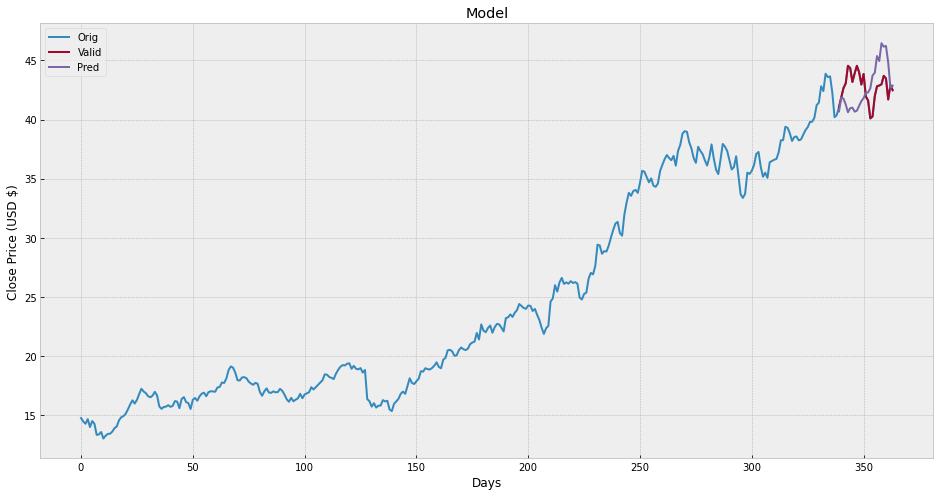

In [14]:
#Visualize the data
predictions = lr_prediction
valid = df[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price (USD $)")
plt.plot(df["close"])
plt.plot(valid[["close", "predictions"]])
plt.legend(["Orig", "Valid", "Pred"])
plt.show()